In [1]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

c:\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
style.use('ggplot') # Matplotlib styles

In [3]:
quandl.get("NBSC/A0N0A03_110000_P_A", authtoken="xhkWXm7LTsLNxk4Ubx4q")

,Value
Date,
2005-12-31,85.0
2006-12-31,106.0
2007-12-31,161.0
2008-12-31,186.0
2009-12-31,221.0
2010-12-31,212.0
2011-12-31,212.0
2012-12-31,275.0
2013-12-31,299.0


In [4]:
df = quandl.get("WIKI/GOOGL") #Getting dataset from quandl databank

In [5]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']] #Listing out all the columns available in our dataset

In [6]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0	#Creating a new column which stores the High Low percentage 

In [7]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0	#Creating another column which stores the percentage change of the stocks
print(df)

              Adj. Open    Adj. High     Adj. Low   Adj. Close  Adj. Volume  \
Date                                                                          
2004-08-19    50.159839    52.191109    48.128568    50.322842   44659000.0   
2004-08-20    50.661387    54.708881    50.405597    54.322689   22834300.0   
2004-08-23    55.551482    56.915693    54.693835    54.869377   18256100.0   
2004-08-24    55.792225    55.972783    51.945350    52.597363   15247300.0   
2004-08-25    52.542193    54.167209    52.100830    53.164113    9188600.0   
2004-08-26    52.637487    54.142132    52.492038    54.122070    7094800.0   
2004-08-27    54.217364    54.478169    53.008633    53.239345    6211700.0   
2004-08-30    52.802998    52.908323    51.162935    51.162935    5196700.0   
2004-08-31    51.318415    52.015567    51.238167    51.343492    4917800.0   
2004-09-01    51.509003    51.644421    49.989312    50.280210    9138200.0   
2004-09-02    49.698414    51.343492    49.623182   

In [8]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']] #Selecting the required columns for making the predictions

In [9]:
print(df)

             Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                      
2004-08-19    50.322842  8.072956    0.324968   44659000.0
2004-08-20    54.322689  7.921706    7.227007   22834300.0
2004-08-23    54.869377  4.049360   -1.227880   18256100.0
2004-08-24    52.597363  7.657099   -5.726357   15247300.0
2004-08-25    53.164113  3.886792    1.183658    9188600.0
2004-08-26    54.122070  3.048837    2.820391    7094800.0
2004-08-27    53.239345  2.760245   -1.803885    6211700.0
2004-08-30    51.162935  3.411430   -3.106003    5196700.0
2004-08-31    51.343492  1.514115    0.048866    4917800.0
2004-09-01    50.280210  3.291771   -2.385589    9138200.0
2004-09-02    50.912161  3.378977    2.442224   15118600.0
2004-09-03    50.159839  2.419758   -0.931154    5152400.0
2004-09-07    50.947269  2.352825    0.564301    5847500.0
2004-09-08    51.308384  2.473118    1.548541    4985600.0
2004-09-09    51.313400  1.671391   -0.185366    4061700

In [10]:
p = pd.DataFrame(df['Adj. Close'])

In [11]:
print(df['Adj. Close'])

Date
2004-08-19      50.322842
2004-08-20      54.322689
2004-08-23      54.869377
2004-08-24      52.597363
2004-08-25      53.164113
2004-08-26      54.122070
2004-08-27      53.239345
2004-08-30      51.162935
2004-08-31      51.343492
2004-09-01      50.280210
2004-09-02      50.912161
2004-09-03      50.159839
2004-09-07      50.947269
2004-09-08      51.308384
2004-09-09      51.313400
2004-09-10      52.828075
2004-09-13      53.916435
2004-09-14      55.917612
2004-09-15      56.173402
2004-09-16      57.161452
2004-09-17      58.926902
2004-09-20      59.864797
2004-09-21      59.102444
2004-09-22      59.373280
2004-09-23      60.597057
2004-09-24      60.100525
2004-09-27      59.313094
2004-09-28      63.626409
2004-09-29      65.742942
2004-09-30      65.000651
                 ...     
2018-01-09    1112.790000
2018-01-10    1110.140000
2018-01-11    1111.880000
2018-01-12    1130.650000
2018-01-16    1130.700000
2018-01-17    1139.100000
2018-01-18    1135.970000
2018-01

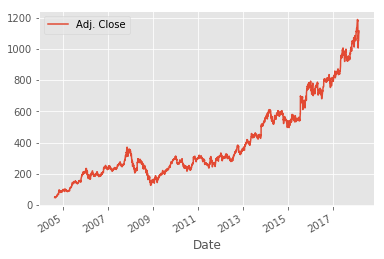

In [12]:
p.plot()

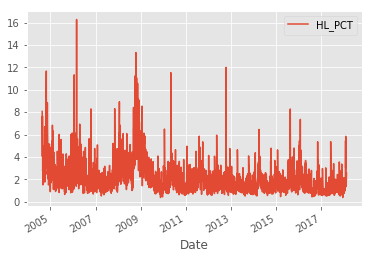

In [13]:
p = pd.DataFrame(df['HL_PCT'])
p.plot()

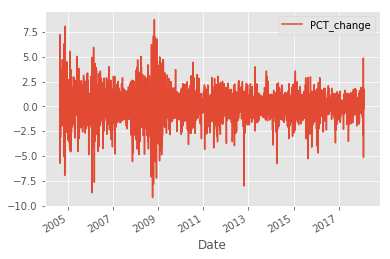

In [14]:
p = pd.DataFrame(df['PCT_change'])
p.plot()

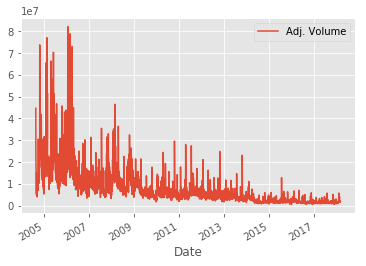

In [15]:
p = pd.DataFrame(df['Adj. Volume'])
p.plot()

In [16]:
forecast_col = 'Adj. Close'	#This column is the forecast column which we wil predict = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']] #Selecting the required columns for making the predictions

In [17]:
df.fillna(value=-99999, inplace=True)                      #Filling not number cells with large negative value
forecast_out = int(math.ceil(0.01 * len(df)))              #Size of the input dataset taken into consideration
df['label'] = df[forecast_col].shift(-forecast_out)        #Creating another column by shifting the Adj. Close column

In [18]:
X = np.array(df.drop(['label'], 1))

In [19]:
X = preprocessing.scale(X)         # Making mean nil and deviation one

In [20]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [21]:
df.dropna(inplace=True)                 #Droping the Not numbers columns

In [22]:
y = np.array(df['label'])

In [23]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2) #Splitting data set into random numbers of train and test subsets

In [24]:
clf = LinearRegression(normalize=False, n_jobs=-1)  # normalize => The regressors "clf" will be normalized before regression by subtracting the mean and dividing by the l2-norm.
                                                    # n_jobs => The number of jobs to use for the computation. If -1 all CPUs are used.

In [25]:
clf.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [26]:
confidence = clf.score(X_test, y_test) #Finding the accuracy of model on test dataset

In [27]:
print(confidence)

0.9791316814334332


In [28]:
forecast_set = clf.predict(X_lately)    #Predicting the stock for future dates

In [29]:
df['Forecast'] = np.nan                 #New column for forecasting data

In [30]:
last_date = df.iloc[-1].name           # .iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

In [31]:
last_unix = last_date.timestamp()       # Time taken from UNIX timestamp started from 1970

In [32]:
one_day = 86400                         # seconds in a day

In [33]:
next_unix = last_unix + one_day         # incrementing the day

In [34]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i] #Creating column to store the predicted values

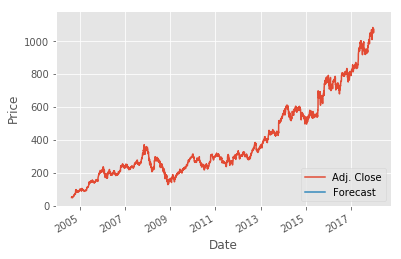

In [35]:
df['Adj. Close'].plot()                         #Plotting the graph for predicted value for next 30days approx
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()